## Eurojackpotin säännöt

Eurojackpotissa yksinkertaistettuna on vain kaksi sääntöä

1. Pelaaja valitsee viisi numeroa välillä 1-50
2. Pelaaja valitsee kaksi numeroa välillä 1-12

Jos näistä osuu vähintään 1+2 tai 2+1, pelaaja voittaa. Voittosumma riippuu siitä, kuinka moni numero osuu oikeaan ja kuinka moni muu pelaaja osui myös oikeaan. Esimerkiksi siis osumalla 5+2 voi parhaillaan saada 120 miljoonaa, mutta jos kaksi pelaajaa saa 5+2, on voitto 60 miljoonaa.

## Kunkin voittoluokan voitot

Koska voitot vaihtelevat pelaajien määrän mukaan, voi 2+1 tuoda tiettynä kertana esimerkiksi 7,6€ ja toisena kertana 9,2€. Jotta voimme suorittaa simulaation odotetuille voitoille (tappioille), selvitetään keskimääräinen voitto kullekin voittoluokalle. Sivustolla [euro-jackpot.net](https://www.euro-jackpot.net/fi/tilastot/palkinnot) löytyy alla oleva taulukko, josta voidaan laskea keskimääräinen voitto jokaiselle voittoluokalle.


|Voittoluokka|Voittojen kokonaissumma|Voittajat|
|:----------:|:---------------------:|:-------:|
|5+2|6 619 317 428€ | 175 |
|5+1|2 402 578 400€ | 2909 |
|5+0|670 755 812€ | 5519 |
|4+2|216 896 753€ | 37 864 |
|4+1|193 826 629€ | 634 813 |
|4+0|143 556 681€ | 1 215 547 |
|3+2|158 843 349€ | 1 651 042 |
|3+1|493 149 724€| 27 798 097 |
|3+0|823 502 932€ | 52 982 811 |
|2+2|484 805 921€ | 23 596 579 |
|2+1|3 317 418 422€ | 397 632 399 |
|1+2|1 235 930 469€| 123 530 970 |

Keskimääräinen voitto saadaan seuraavalla python-kaavalla:

In [1]:
import pandas as pd

win_categories = ['5+2', '5+1', '5+0', '4+2','4+1', '4+0', '3+2', '3+1', '3+0', '2+2', '2+1', '1+2']
paid_prizes = paid_prizes = [6619317428, 2402578400, 670755812, 216896753, 193826629, 143556681,
                             158843349, 493149724, 823502932, 484805921, 3317418422, 1235930469]
winners = [175, 2909, 5519, 37864, 634813, 1215547, 1651042, 27798097, 52982811, 26596579, 397632399, 123530970]
df = pd.DataFrame({"voittoluokka": win_categories,
                  "voittojen kokonaissumma": paid_prizes,
                  "voittajat": winners})

df['keskimääräinen voitto'] = round(df['voittojen kokonaissumma']/df['voittajat'], 2)
df

,voittoluokka,voittojen kokonaissumma,voittajat,keskimääräinen voitto
0,5+2,6619317428,175,37824671.02
1,5+1,2402578400,2909,825912.13
2,5+0,670755812,5519,121535.75
3,4+2,216896753,37864,5728.31
4,4+1,193826629,634813,305.33
5,4+0,143556681,1215547,118.10
6,3+2,158843349,1651042,96.21
7,3+1,493149724,27798097,17.74
8,3+0,823502932,52982811,15.54
9,2+2,484805921,26596579,18.23


Tästä taulukosta nähdään siis, että esimerkiksi osumalla 1+2 voitot ovat keskimäärin 10,01 euroa ja päävoitto 5+2 on keskimäärin 37,82 miljoonaa euroa. Seuraavaksi suoritetaan simulaatio, joka laskee voitot seuraavalle 50 vuodelle.

## Simulaatio

Simulaatio toimii seuraavalla tavalla:

1. Syötän yhden pelattavan rivin, tässä tapauksessa sattumalta valitun 5, 24, 25, 28, 29 + 7, 9
2. Pelaan vakioriviä joka tiistai ja perjantai, eli 2 kertaa viikossa. Tämä tekee 104 riviä vuodessa ja 5200 riviä 50 vuodessa.
3. Simuloin 5200 riviä ja katson montako osumaa tuli kohdassa 1 valittuun riviini
4. Toistan tämän simulaation 10000 kertaa, jotta yksittäiset sattumat eivät vaikuta niin paljoa tulokseen.

In [2]:
import random

def simulator(n_years = 50):
    x=0
    y = n_years*52*2 #2 times per week for n_years
    concurrent_prize = 0
    daily_winnings = []
    while x < y:
        #our chosen row
        first_five = [5, 24, 25, 28, 29]
        bonus_numbers = [7, 9]

        #random number generator
        generated_row = random.sample(range(1,51), 5)
        generated_bonus = random.sample(range(1,13), 2)

        #checking how many numbers match
        regular_hits = 0
        bonus_hits = 0
        for n in generated_row:
            if n in first_five:
                regular_hits += 1
        for n in generated_bonus:
            if n in bonus_numbers:
                bonus_hits += 1
        
        #the prizes are copypasted from the df above, -2 is the price of coupon
        if (regular_hits == 5 and bonus_hits == 2):
            prize = 37824671.02-2
        elif (regular_hits == 5 and bonus_hits == 1):
            prize = 825912.13-2
        elif (regular_hits == 5 and bonus_hits == 0):
            prize = 121535.75-2
        elif (regular_hits == 4 and bonus_hits == 2):
            prize = 5728.31-2
        elif (regular_hits == 4 and bonus_hits == 1):
            prize = 305.33-2
        elif (regular_hits == 4 and bonus_hits == 0):
            prize = 118.10-2
        elif (regular_hits == 3 and bonus_hits == 2):
            prize = 96.21-2
        elif (regular_hits == 3 and bonus_hits == 1):
            prize = 17.74-2
        elif (regular_hits == 3 and bonus_hits == 0):
            prize = 15.54-2
        elif (regular_hits == 2 and bonus_hits == 2):
            prize = 18.23-2
        elif (regular_hits == 2 and bonus_hits == 1):
            prize = 8.34-2
        elif (regular_hits == 1 and bonus_hits == 2):
            prize = 10.01-2
        #no prize if 0+0, 1+0, 2+0, 0+1 or 0+2
        else:
            prize = -2
        
        daily_winnings.append(prize)
        '''
        # example print one time
        if x == 0:
            print(f"Example of one row:")
            print(f"Our random row:{first_five}, bonus: {bonus_numbers}")
            print(f"winning row: {generated_row}, bonus: {generated_bonus}")
            print(f"Regular number matches: {regular_hits}")
            print(f"Bonus number matches: {bonus_hits}")
            print(f"Prize: {prize}")
        '''
        x+=1
    return daily_winnings
        
prize_list = simulator()
print(len(prize_list))

5200


Yllä oleva simulaattori palauttaa listan, jossa on 5200 eri voittosummaa. Sen ensimmäiset 10 numeroa näyttää siis tältä:

In [3]:
prize_list[:10]

[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]

Seuraavaksi suoritan kyseisen 50 vuoden simulaation 1000 kertaa, jotta satunnaisuus vaikuttaa vähemmän lopputulokseen. Haluan jokaiselle päivälle ns. keskiarvon, enkä esim vain -2. Ts. luon siis numpyn avulla taulukon, jossa yhdellä rivillä on aina 5200 eri voittoa, ja lasken rivien keskiarvon.

In [4]:
import numpy as np

n_simulations = 1000
results = np.zeros((n_simulations, 5200))

for i in range(n_simulations):
    results[i] = simulator()

daily_avg = np.mean(results, axis=0)
daily_avg

array([-1.7266 , -1.69836, -1.67323, ..., -1.71   , -1.39564, -1.54532])

Lopulta laitetaan tämä aikajanalle, jotta nähdään miltä voittomme seuraavan 50 vuoden ajalta näyttäisivät.

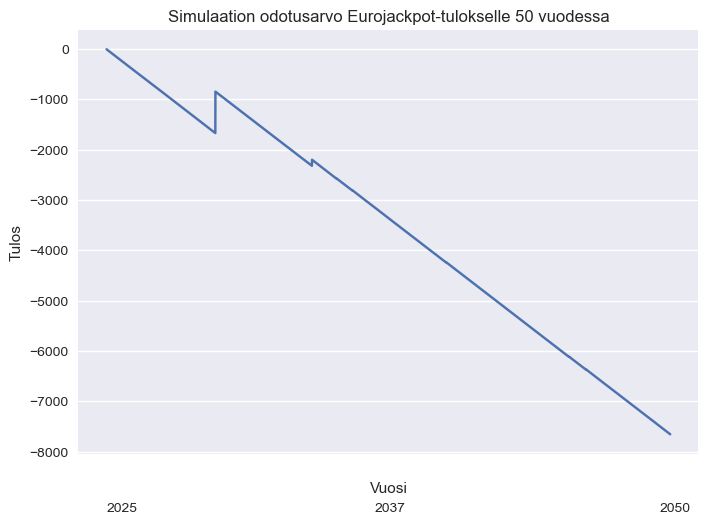

In [5]:
import itertools
import matplotlib.pyplot as plt

#calculating cumulative sum
cumulative_sum = list(itertools.accumulate(daily_avg))
len(cumulative_sum)

#plot
plt.style.use('seaborn')
plt.plot(cumulative_sum)
plt.title("Simulaation odotusarvo Eurojackpot-tulokselle 50 vuodessa")
plt.xticks([])
plt.text(s="2025", y = -9200, x = 0)
plt.text(s="2037", y = -9200, x = 2470)
plt.text(s="2050", y = -9200, x = 5100)
plt.ylabel("Tulos")
plt.xlabel("Vuosi", labelpad=20)
plt.show()

## Lopputulos

Seuraavaksi katsotaan, olenko itse tällä hetkellä simulaation odotusarvoa paremmalla puolella vai huonommalla puolella. Tämä onnistuu yksinkertaisella datatiedostolla, jossa on kaikki pelaamani Eurojackpot-kierrokset. Tiedosto näyttää tältä.

In [6]:
euro_csv = pd.read_csv('eurojackpot.csv', delimiter = ";")
euro_csv.head(5)

,Date,Bet,Win,Profit
0,19.9.2025,2,0.0,-2.0
1,23.9.2025,2,0.0,-2.0
2,26.9.2025,2,0.0,-2.0
3,30.9.2025,2,7.6,5.6
4,3.10.2025,2,0.0,-2.0


Eli graafina tämän hetken tilanne näyttää tältä.

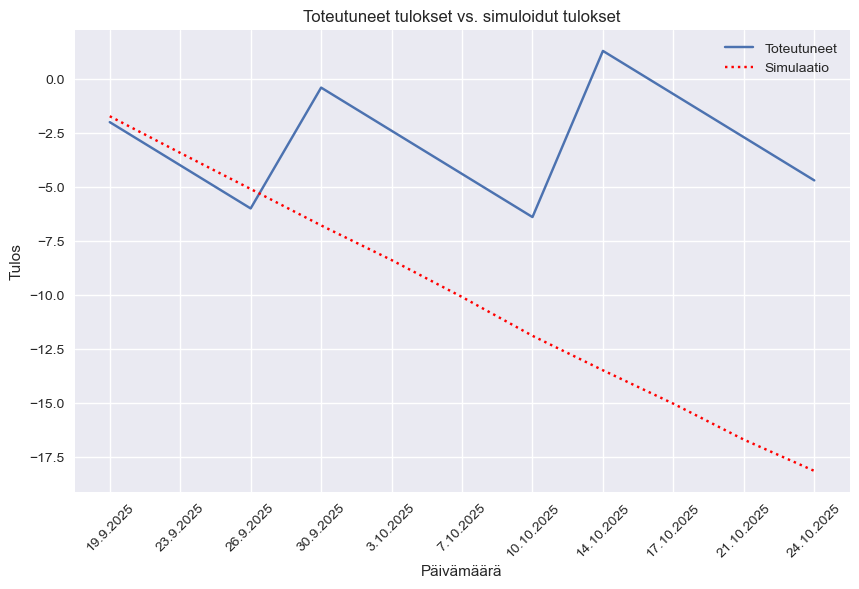

In [7]:
real_profits = euro_csv['Profit']
cumulative_sum_real = list(itertools.accumulate(real_profits))
#simulator for same amount of days that I have actually played
cumulative_sum_simulator = list(itertools.accumulate(daily_avg[:len(real_profits)]))

#plotting
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
plt.plot(euro_csv['Date'], cumulative_sum_real)
plt.plot(cumulative_sum_simulator, color = 'red', linestyle = 'dotted')
plt.title("Toteutuneet tulokset vs. simuloidut tulokset")
plt.legend(["Toteutuneet", "Simulaatio"])
plt.xticks(rotation=45)
plt.ylabel("Tulos")
plt.xlabel("Päivämäärä")
plt.savefig('toteutuneet_vs_simulaatio.png')
plt.show()

Jos toteutunut viiva on simulaatioviivan yläpuolella, tarkoittaa se sitä, että tuurimme on odotettua parempi. Tässä tapauksessa olemme siis Hannu Hanhia. Jos olemme simulaatioviivan alapuolella, olemme epäonnisia Aku Ankkoja. Tämän saa yksinkertaisella if-lauseella selvitettyä.

In [8]:
if sum(real_profits) > sum(daily_avg[:len(real_profits)]):
    result = "Hannu Hanhi"
else:
    result = "Aku Ankka"
print(result)
#saving file for correct website image
with open ("result.txt", "w") as f:
    f.write(result)

Hannu Hanhi
